In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
def add_more_info(df):
    df['nodes'] = (df['g1_nodes'] + df['g2_nodes']) / 2
    df['edges'] = (df['g1_edges'] + df['g2_edges']) / 2
    df['nodes^2'] = df['g1_nodes'] * df['g2_nodes']
    df['edges^2'] = df['g1_edges'] * df['g2_edges']
    df['nodes_X_edges'] = (df['g1_nodes'] * df['g1_edges'] + df['g2_nodes'] * df['g2_edges']) / 2
    df['log_nodes_X_edges'] = np.log(df['nodes_X_edges'])
    df['uncommon_nodes'] = df['nodes'] - df['generalization_nodes']
    df['log_uncommon_nodes'] = np.log(df['uncommon_nodes'])
    df['log_avg_time'] = np.log(df['avg_time'])
    df['log_nodes'] = np.log(df['nodes'])
    df['log_nodes^2'] = np.log(df['nodes^2'])
    df['uncommon_edges'] = df['edges'] - df['generalization_edges']
    df['log_uncommon_edges'] = np.log(df['uncommon_edges'])
    df['uncommon_nodes_X_uncommon_edges'] = df['uncommon_nodes'] * df['uncommon_edges']
    df['log_uncommon_nodes_X_uncommon_edges'] = np.log(df['uncommon_nodes_X_uncommon_edges'])
    df['common_nodes_X_common_edges'] = df['generalization_nodes'] * df['generalization_edges']
    df['log_common_nodes_X_common_edges'] = np.log(df['common_nodes_X_common_edges'])

In [3]:
def linear_regression_of(df, x_column, y_column, x_label=None, y_label=None, title=None):
    X = df[x_column].values.reshape(-1, 1)
    Y = df[y_column].values.reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    r_squared = r2_score(Y, Y_pred)

    plt.scatter(X, Y, s=5)
    plt.plot(X, Y_pred, color='red')
    if x_label is None:
        x_label = x_column
    plt.xlabel(x_label)
    if y_label is None:
        y_label = y_column
    plt.ylabel(y_label)
    if title is None:
        title = 'Linear Regression'
    plt.title(title)
    plt.show()

    data = {'coef': linear_regressor.coef_[0][0], 'intercept': linear_regressor.intercept_[0], 'r_squared': r_squared}
    print(data)

In [25]:
df = pd.read_csv("AggregatedData.csv")
may_df = pd.read_csv("ASGardOnSimilarData.csv")
random_df = pd.read_csv("RandomAggregatedData.csv")
may_random_df = pd.read_csv("ASGardOnRandomData.csv")
add_more_info(df)
add_more_info(may_df)
add_more_info(random_df)
add_more_info(may_random_df)
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,name,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,time0,...,log_nodes,uncommon_edges,log_uncommon_edges,uncommon_nodes_X_uncommon_edges,log_uncommon_nodes_X_uncommon_edges,common_nodes_X_common_edges,log_common_nodes_X_common_edges,nodes_X_edges,log_nodes_X_edges,log_nodes^2
0,0,35,27,11,22,72,71,171,170,92,...,4.799914,93.5,4.537961,8087.75,8.998106,945,6.851185,17091.0,9.746307,9.418330
1,1,59,48,18,38,131,130,124,123,122,...,4.848116,78.5,4.363099,5377.25,8.589932,2832,7.948738,16141.0,9.689118,9.695479
2,1000,63,55,17,31,116,115,151,150,120,...,4.894101,77.5,4.350278,5463.75,8.605891,3465,8.150468,17995.0,9.797849,9.770870
3,1001,39,30,13,23,230,229,109,108,197,...,5.132853,138.5,4.930870,18074.25,9.802244,1170,7.064759,32221.0,10.380374,10.129427
4,1002,34,29,12,19,112,111,146,145,94,...,4.859812,99.0,4.595120,9405.00,9.148997,986,6.893656,16801.0,9.729194,9.702105


In [10]:
may_random_df.avg_time.sum() / 60_000

116.49475333333332

In [7]:
import math
may_df = pd.read_csv("ASGardOnRandomData.csv")
times_names=[f'time{i}' for i in range(5)]
# may_df['times_count'] = may_df.apply(lambda x: 10 if pd.notna(x['time5']) else 5, axis=1)
may_df['avg_time'] = may_df.apply(lambda x: sum(x[times_names])/5, axis=1)
may_df['std_dev'] = may_df.apply(lambda x: math.sqrt(sum(map(lambda y: (x[y] - x['avg_time']) ** 2, times_names)) / 5), axis=1)
may_df

,name,time0,time1,time2,time3,time4,avg_time,std_dev
0,10000,629,633,631,652,642,637.4,8.546344
1,1000,671,651,636,646,676,656.0,15.165751
2,1001,690,644,657,646,664,660.2,16.593975
3,1002,705,662,656,659,680,672.4,18.315021
4,1003,663,654,655,688,695,671.0,17.169741
...,...,...,...,...,...,...,...,...
9992,9998,670,667,686,648,647,663.6,14.650597
9993,9999,730,628,682,665,755,692.0,45.470870
9994,999,697,661,659,632,644,658.6,21.914379
9995,99,688,626,662,712,624,662.4,34.395349


In [8]:
fixed = pd.merge(may_df, random_df[['name', 'generalization_nodes', 'generalization_edges', 'generalization_node_variables', 'generalization_edge_variables', 'g1_nodes', 'g1_edges', 'g2_nodes', 'g2_edges']], on='name')
fixed = fixed[pd.notna(fixed['time0'])]
fixed.to_csv('ASGardOnRandomData.csv', index=False)
fixed

,name,time0,time1,time2,time3,time4,avg_time,std_dev,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges
0,10000,629,633,631,652,642,637.4,8.546344,34,31,12,15,69,68,97,96
1,1000,671,651,636,646,676,656.0,15.165751,47,35,11,31,93,92,154,153
2,1001,690,644,657,646,664,660.2,16.593975,45,39,17,26,277,276,160,159
3,1002,705,662,656,659,680,672.4,18.315021,70,57,26,48,273,272,304,303
4,1003,663,654,655,688,695,671.0,17.169741,32,29,11,14,243,242,82,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9885,9998,670,667,686,648,647,663.6,14.650597,74,70,21,27,323,322,114,113
9886,9999,730,628,682,665,755,692.0,45.470870,47,38,17,33,124,123,253,252
9887,999,697,661,659,632,644,658.6,21.914379,39,31,12,26,122,121,182,181
9888,99,688,626,662,712,624,662.4,34.395349,20,19,6,6,68,67,79,78


In [13]:
may_random_df[may_random_df['avg_time'] > 5000]

,name,time0,time1,time2,time3,time4,avg_time,std_dev,generalization_nodes,generalization_edges,...,log_uncommon_nodes,log_avg_time,log_nodes,log_nodes^2,uncommon_edges,log_uncommon_edges,uncommon_nodes_X_uncommon_edges,log_uncommon_nodes_X_uncommon_edges,common_nodes_X_common_edges,log_common_nodes_X_common_edges
3309,4003,820317,1247,975,1087,1758,165076.8,327620.209622,35,32,...,4.119037,12.014166,4.569543,9.033842,63.5,4.151040,3905.25,8.270077,1120,7.021084
5117,5652,43006,1135,943,878,1182,9428.8,16788.985501,47,44,...,4.158883,9.151524,4.709530,9.301277,66.0,4.189655,4224.00,8.348538,2068,7.634337


In [45]:
import pyperclip

# pyperclip.copy(",".join(map(lambda x: str(x), list(df2[pd.isnull(df2.avg_time)].name))))
times_names=[f'time{i}' for i in range(10)]
times_names.append('avg_time')
times_names.append('std_dev')
names = ['name']
names += times_names
x = df2[pd.isnull(df2.avg_time)][names]
all_data = ''
def fixer(row):
    print(row['name'])
    empty_cell = ''
    for time in reversed(times_names):
        if pd.isna(row[time]):
            empty_cell = time
    empty_row_index = times_names.index(empty_cell)
    data = f'{int(row["name"])} to listOf('
    for i in range(empty_row_index - 2):
        data += f'{int(row[times_names[i]])}, '
    data += '),\n'
    return data


x['data'] = x.apply(fixer, axis = 1)
x['data'].to_csv('x.csv', index=False)

10.0
1021.0
1038.0
11.0
1124.0
1141.0
1170.0
118.0
1206.0
1213.0
1225.0
1256.0
1285.0
1290.0
1303.0
1308.0
1349.0
135.0
1454.0
1472.0
1503.0
1504.0
1508.0
1515.0
1517.0
1570.0
1602.0
1659.0
1692.0
1716.0
1785.0
182.0
1827.0
1860.0
1916.0
1973.0
198.0
1987.0
200.0
2016.0
2019.0
2039.0
2121.0
2135.0
2137.0
2182.0
2195.0
2245.0
2250.0
2293.0
2294.0
2299.0
2318.0
2357.0
2366.0
2373.0
2375.0
2417.0
2468.0
2490.0
2521.0
2522.0
2537.0
2562.0
2594.0
2600.0
2611.0
2613.0
2626.0
2628.0
2629.0
2630.0
2636.0
2654.0
2669.0
2697.0
2736.0
2752.0
2835.0
285.0
2877.0
291.0
293.0
2944.0
2975.0
3.0
3068.0
3128.0
3152.0
3188.0
323.0
3238.0
3242.0
3272.0
3319.0
333.0
3331.0
3338.0
3344.0
338.0
342.0
359.0
3602.0
3616.0
3679.0
3693.0
3752.0
3821.0
3833.0
3882.0
3900.0
394.0
3945.0
3946.0
3948.0
3993.0
4013.0
4023.0
4060.0
4090.0
4094.0
417.0
4194.0
4221.0
4244.0
4245.0
4262.0
4274.0
4275.0
4282.0
429.0
4302.0
4322.0
4330.0
4380.0
4399.0
4459.0
4510.0
4535.0
4566.0
4582.0
4583.0
4603.0
4607.0
4635.0
4679.0
4

In [21]:
fixed = pd.merge(df2[['name', 'generalization_nodes','generalization_edges','generalization_node_variables','generalization_edge_variables','g1_nodes','g1_edges','g2_nodes','g2_edges']], df22[times_names], on='name')
fixed

,name,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,time0,...,time2,time3,time4,time5,time6,time7,time8,time9,avg_time,std_dev
0,10,80,72,22,36,137,136,229,228,196,...,179,196,185,217,190,217,197,198,197.2,11.487384
1,1021,51,35,19,49,228,227,208,207,365,...,350,378,387,361,346,333,338,337,353.9,17.323106
2,1038,50,24,10,60,221,220,210,209,406,...,446,458,480,450,438,480,470,515,454.7,32.372983
3,11,45,39,11,21,143,142,221,220,174,...,162,168,177,168,170,412,182,177,195.4,72.441977
4,1124,75,54,17,56,166,165,150,149,202,...,196,197,216,214,211,207,200,198,209.7,16.882239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,9931,78,63,18,42,252,251,205,204,628,...,643,645,468,660,684,654,427,494,592.6,87.635837
347,9944,57,38,20,52,224,223,330,329,785,...,783,811,830,815,839,819,811,796,806.2,20.306649
348,9951,81,57,24,64,209,208,171,170,376,...,387,365,373,400,424,384,366,427,387.5,21.406775
349,9954,55,49,20,30,174,173,158,157,176,...,164,203,185,200,154,245,179,186,189.7,24.182845


In [40]:
# add_more_info(fixed)
df.to_csv('AggregatedData.csv', index=False)

In [23]:
times_names = [f'time{i}' for i in range(5)]
times_names.append('avg_time')
times_names.append('std_dev')
times_names.append('name')
may_random_df[may_random_df.avg_time.notnull()].sum()[times_names] / 60_000

time0       113.582750
time1       113.584567
time2       113.516350
time3       113.569650
time4       113.678317
avg_time    113.586327
std_dev       4.766145
name        823.152950
dtype: float64

In [21]:
may_random_df.describe()[['nodes', 'edges', 'avg_time', 'std_dev']]

,nodes,edges,avg_time,std_dev
count,9888.000000,9888.000000,9888.000000,9888.000000
mean,131.146895,130.146895,689.237419,28.920784
std,54.903988,54.903988,63.547379,29.128502
min,51.000000,50.000000,598.000000,0.748331
25%,89.500000,88.500000,650.600000,13.602941
50%,116.750000,115.750000,668.400000,20.897847
75%,160.500000,159.500000,707.000000,32.814935
max,369.500000,368.500000,1435.000000,629.714221


In [17]:
quantile = df['avg_time'].quantile(0.99)
plt_df = df[df['avg_time'] < quantile]

<Axes: xlabel='nodes', ylabel='time (ms)'>

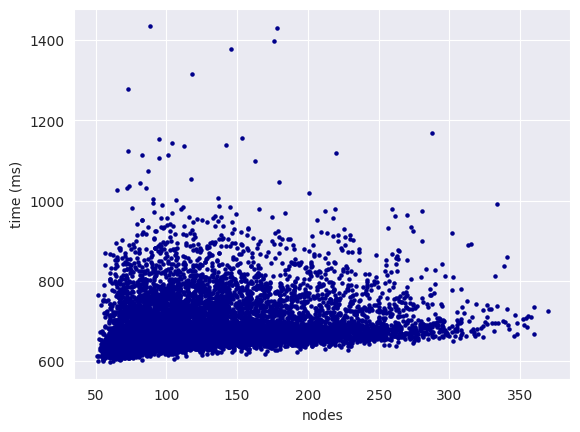

In [15]:
may_random_df.plot.scatter(x='nodes', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes')

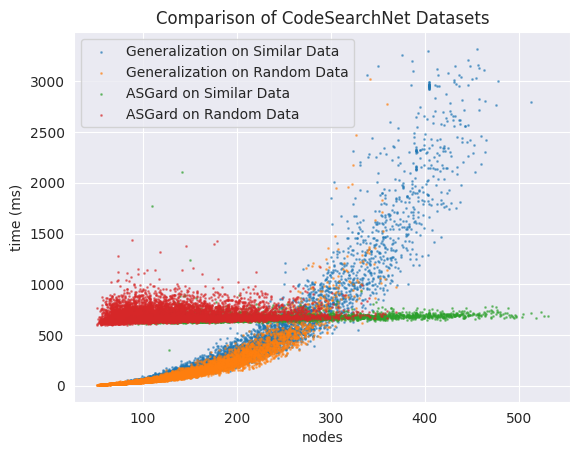

In [32]:
# Create a scatter plot for all metrics
plt.scatter(plt_df['nodes'], plt_df['avg_time'], label='Generalization on Similar Data', s=1, alpha=0.5)
plt.scatter(random_df['nodes'], random_df['avg_time'], label='Generalization on Random Data', s=1, alpha=0.5)
plt.scatter(may_df['nodes'], may_df['avg_time'], label='ASGard on Similar Data', s=1, alpha=0.5)
plt.scatter(may_random_df['nodes'], may_random_df['avg_time'], label='ASGard on Random Data', s=1, alpha=0.5)

# Customize the plot
plt.xlabel('nodes')
plt.ylabel('time (ms)')
plt.title('Comparison of CodeSearchNet Datasets')
plt.legend()

# Display the plot
plt.show()

<Axes: xlabel='edges', ylabel='time (ms)'>

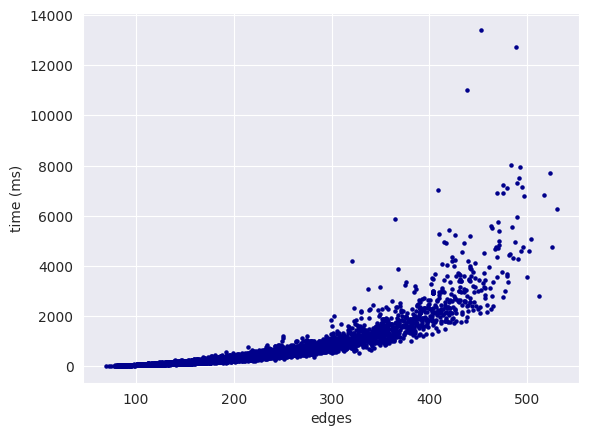

In [88]:
df.plot.scatter(x='edges', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='edges')

<Axes: xlabel='uncommon nodes', ylabel='time (ms)'>

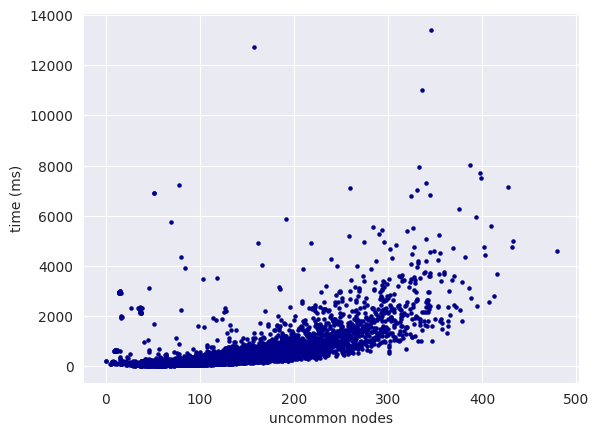

In [89]:
df.plot.scatter(x='uncommon_nodes', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='uncommon nodes')

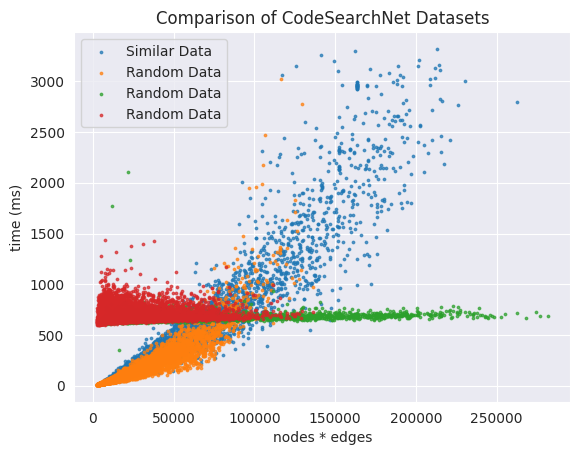

In [34]:
# Create a scatter plot for all metrics
plt.scatter(plt_df['nodes_X_edges'], plt_df['avg_time'], label='Similar Data', s=3, alpha=0.7)
plt.scatter(random_df['nodes_X_edges'], random_df['avg_time'], label='Random Data', s=3, alpha=0.7)
plt.scatter(may_df['nodes_X_edges'], may_df['avg_time'], label='Random Data', s=3, alpha=0.7)
plt.scatter(may_random_df['nodes_X_edges'], may_random_df['avg_time'], label='Random Data', s=3, alpha=0.7)

# Customize the plot
plt.xlabel('nodes * edges')
plt.ylabel('time (ms)')
plt.title('Comparison of CodeSearchNet Datasets')
plt.legend()

# Display the plot
plt.show()

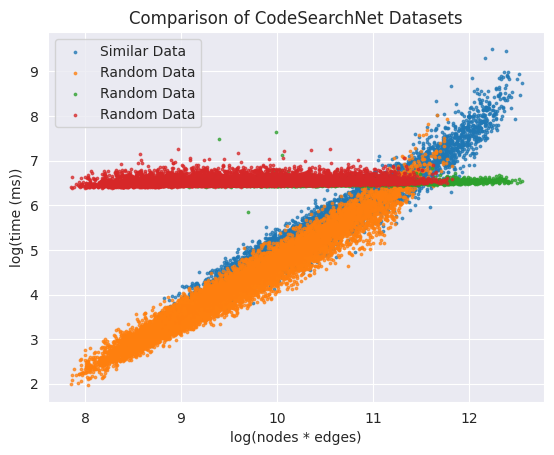

In [48]:
# Create a scatter plot for all metrics
plt.scatter(df['log_nodes_X_edges'], df['log_avg_time'], label='Similar Data', s=3, alpha=0.7)
plt.scatter(random_df['log_nodes_X_edges'], random_df['log_avg_time'], label='Random Data', s=3, alpha=0.7)
plt.scatter(may_df['log_nodes_X_edges'], may_df['log_avg_time'], label='Random Data', s=3, alpha=0.7)
plt.scatter(may_random_df['log_nodes_X_edges'], may_random_df['log_avg_time'], label='Random Data', s=3, alpha=0.7)

# Customize the plot
plt.xlabel('log(nodes * edges)')
plt.ylabel('log(time (ms))')
plt.title('Comparison of CodeSearchNet Datasets')
plt.legend()

# Display the plot
plt.show()

<Axes: xlabel='common nodes', ylabel='time (ms)'>

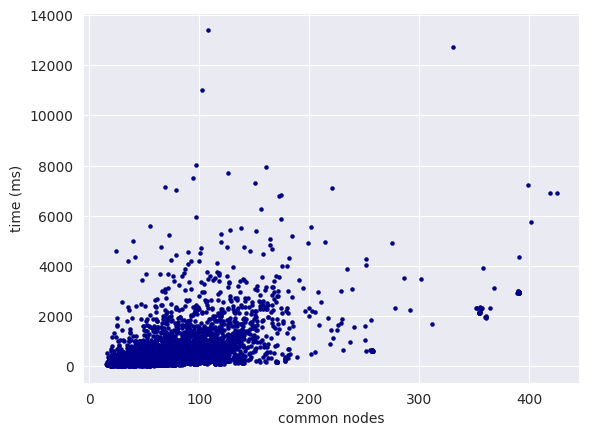

In [91]:
df.plot.scatter(x='generalization_nodes', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='common nodes')

<Axes: xlabel='common edges', ylabel='time (ms)'>

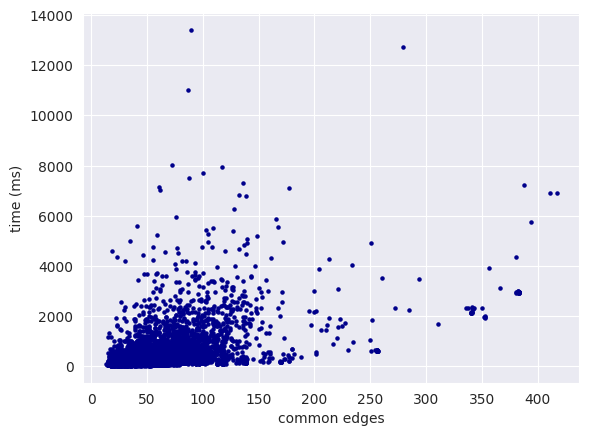

In [92]:
df.plot.scatter(x='generalization_edges', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='common edges')

<Axes: xlabel='uncommon edges', ylabel='time (ms)'>

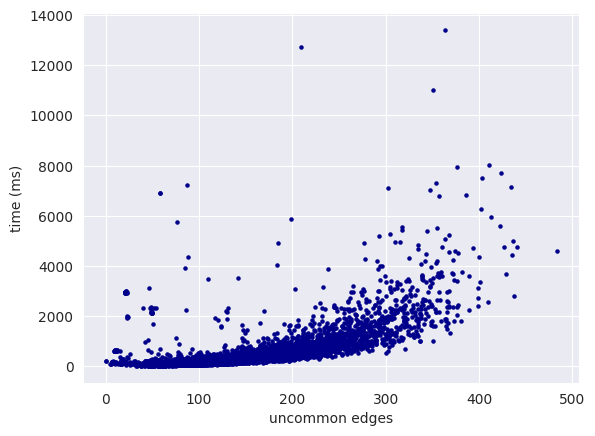

In [93]:
df.plot.scatter(x='uncommon_edges', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='uncommon edges')

<Axes: xlabel='log(uncommon edges)', ylabel='log(time (ms))'>

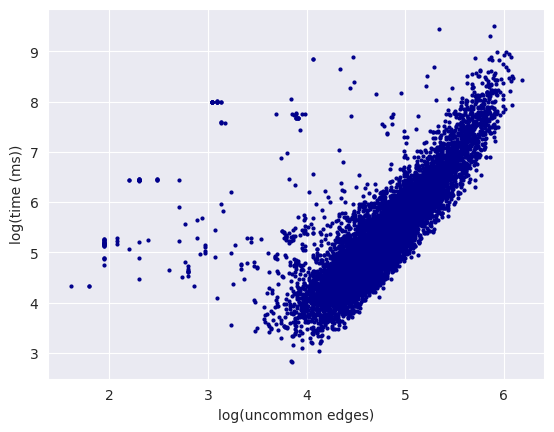

In [94]:
df.plot.scatter(x='log_uncommon_edges', y='log_avg_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(uncommon edges)')

<Axes: xlabel='log(uncommon nodes)', ylabel='log(time (ms))'>

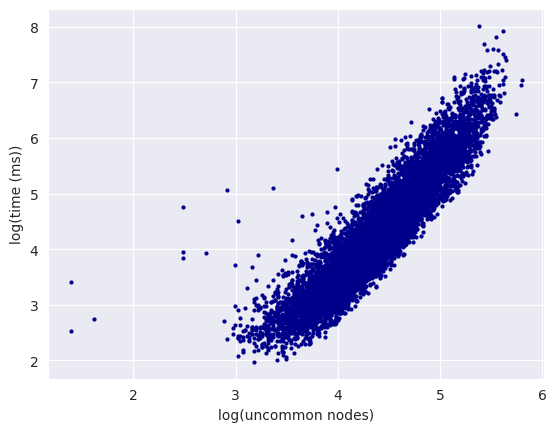

In [8]:
df.plot.scatter(x='log_uncommon_nodes', y='log_avg_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(uncommon nodes)')

<Axes: xlabel='log(nodes)', ylabel='log(time (ms))'>

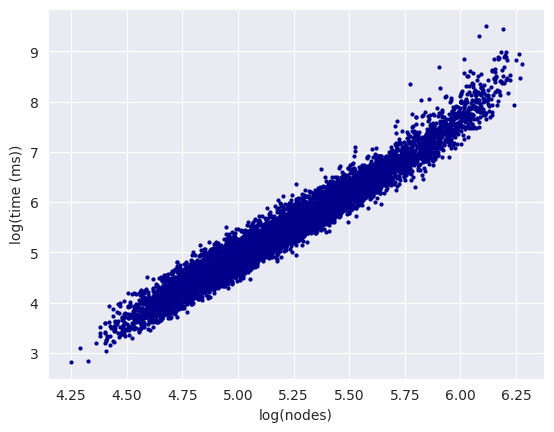

In [97]:
df.plot.scatter(x='log_nodes', y='log_avg_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(nodes)')

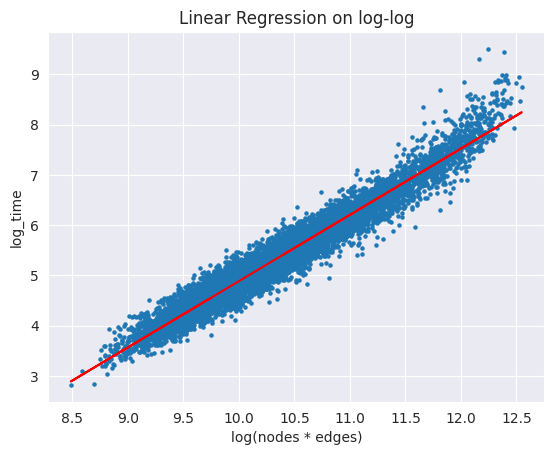

{'coef': 1.3178567390513527, 'intercept': -8.292960545863492, 'r_squared': 0.9464821506178782}


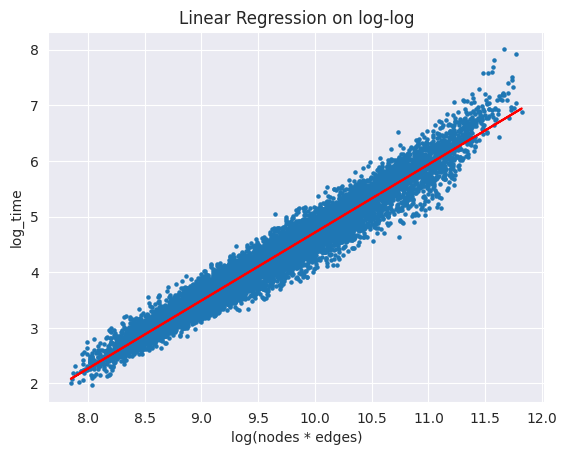

{'coef': 1.2234815762784648, 'intercept': -7.52095776327519, 'r_squared': 0.9518952027085408}


In [37]:
linear_regression_of(df, 'log_nodes_X_edges', 'log_avg_time', x_label='log(nodes * edges)', y_label='log_time', title='Linear Regression on log-log')
linear_regression_of(random_df, 'log_nodes_X_edges', 'log_avg_time', x_label='log(nodes * edges)', y_label='log_time', title='Linear Regression on log-log')

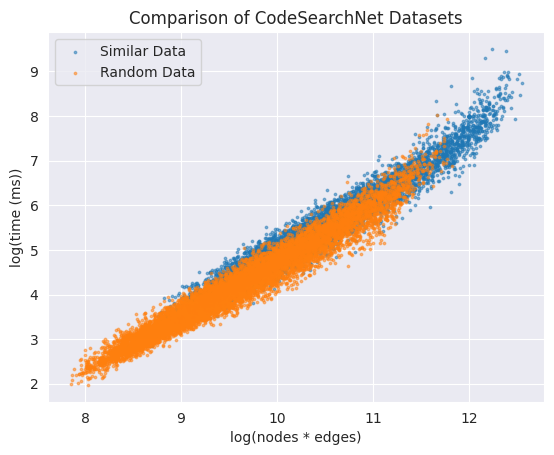

In [24]:
# Create a scatter plot for all metrics
plt.scatter(df['log_nodes_X_edges'], df['log_avg_time'], label='Similar Data', s=3, alpha=0.5)
plt.scatter(random_df['log_nodes_X_edges'], random_df['log_avg_time'], label='Random Data', s=3, alpha=0.5)

# Customize the plot
plt.xlabel('log(nodes * edges)')
plt.ylabel('log(time (ms))')
plt.title('Comparison of CodeSearchNet Datasets')
plt.legend()

# Display the plot
plt.show()

<Axes: xlabel='uncommon nodes * uncommon edges', ylabel='time (ms)'>

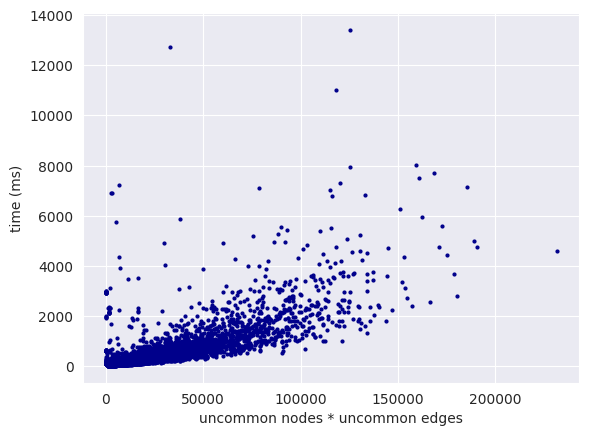

In [100]:
df.plot.scatter(x='uncommon_nodes_X_uncommon_edges', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='uncommon nodes * uncommon edges')

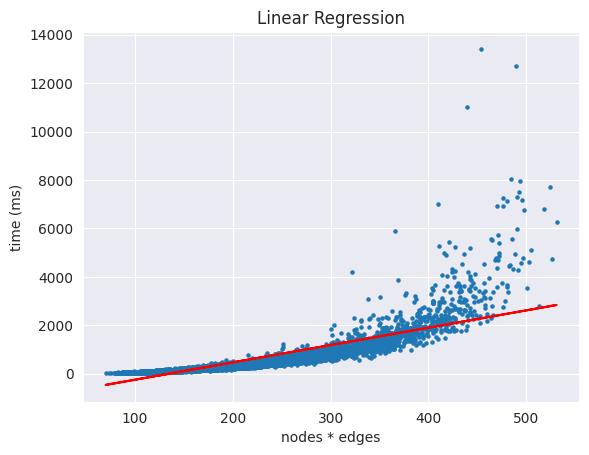

{'coef': 7.160143109336872, 'intercept': -965.3083963659838, 'r_squared': 0.6610677824788872}


In [84]:
quantile = df['avg_time'].quantile(0.99)
plt_df = df[df['avg_time'] < quantile]
linear_regression_of(df, 'nodes', 'avg_time', x_label='nodes * edges', y_label='time (ms)', title='Linear Regression')

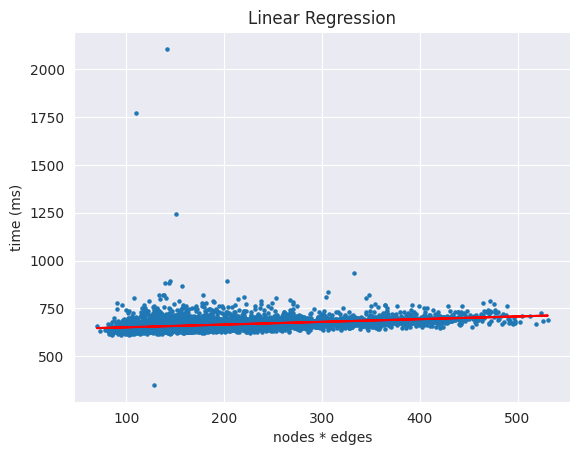

{'coef': 0.14168074777617215, 'intercept': 637.2026310699279, 'r_squared': 0.11963870542858812}


In [50]:
linear_regression_of(may_df, 'nodes', 'avg_time', x_label='nodes * edges', y_label='time (ms)', title='Linear Regression')

/tmp/ipykernel_2291045/2995433484.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_df['nodes_bins'] = pd.cut(plt_df['nodes'], bins=bins, include_lowest=True)


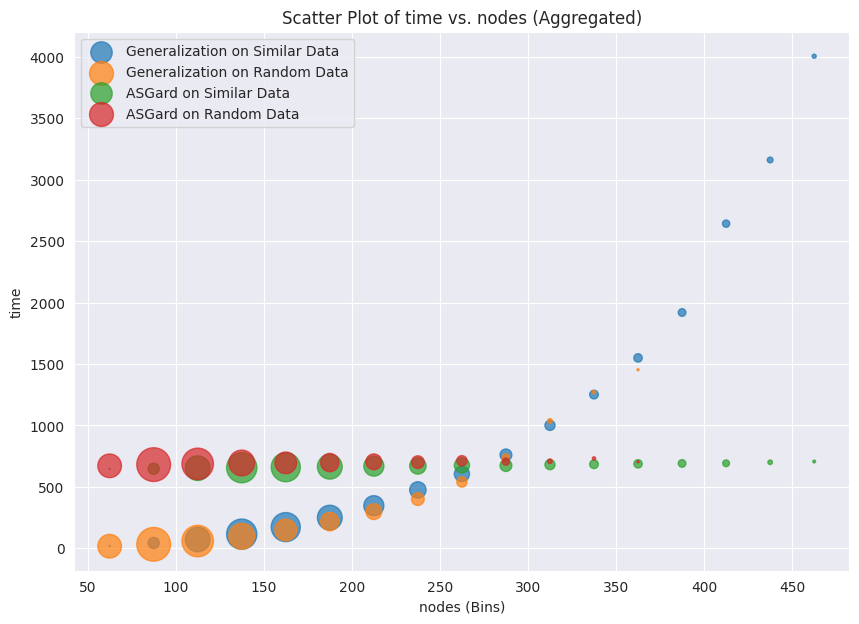

In [47]:
# Define the bin edges for 'MetricA' range
# 0.0 - 550
bins = [25 * i for i in range(20)]

# Create a new column 'MetricA_bin' by binning 'MetricA' values
df['nodes_bins'] = pd.cut(df['nodes'], bins=bins, include_lowest=True)
plt_df['nodes_bins'] = pd.cut(plt_df['nodes'], bins=bins, include_lowest=True)
random_df['nodes_bins'] = pd.cut(random_df['nodes'], bins=bins, include_lowest=True)
may_df['nodes_bins'] = pd.cut(may_df['nodes'], bins=bins, include_lowest=True)
may_random_df['nodes_bins'] = pd.cut(may_random_df['nodes'], bins=bins, include_lowest=True)

# Group the data by 'MetricA_bin' and calculate the mean of 'MetricB'
grouped_1_data = df.groupby('nodes_bins')['avg_time'].mean().reset_index()
grouped_1_data['nodes_bins_numeric'] = grouped_1_data['nodes_bins'].apply(lambda x: x.mid)
grouped_1_data['weights'] = df.groupby('nodes_bins')['avg_time'].count().reset_index()['avg_time'] / 4

grouped_2_data = random_df.groupby('nodes_bins')['avg_time'].mean().reset_index()
grouped_2_data['nodes_bins_numeric'] = grouped_2_data['nodes_bins'].apply(lambda x: x.mid)
grouped_2_data['weights'] = random_df.groupby('nodes_bins')['avg_time'].count().reset_index()['avg_time'] / 4

grouped_3_data = may_df.groupby('nodes_bins')['avg_time'].mean().reset_index()
grouped_3_data['nodes_bins_numeric'] = grouped_3_data['nodes_bins'].apply(lambda x: x.mid)
grouped_3_data['weights'] = plt_df.groupby('nodes_bins')['avg_time'].count().reset_index()['avg_time'] / 4

grouped_4_data = may_random_df.groupby('nodes_bins')['avg_time'].mean().reset_index()
grouped_4_data['nodes_bins_numeric'] = grouped_4_data['nodes_bins'].apply(lambda x: x.mid)
grouped_4_data['weights'] = may_random_df.groupby('nodes_bins')['avg_time'].count().reset_index()['avg_time'] / 4

plt.figure(figsize=(10, 7))

# Create a scatter plot
plt.scatter(grouped_1_data['nodes_bins_numeric'], grouped_1_data['avg_time'], label='Generalization on Similar Data', s=grouped_1_data['weights'], alpha=0.7)
plt.scatter(grouped_2_data['nodes_bins_numeric'], grouped_2_data['avg_time'], label='Generalization on Random Data', s=grouped_2_data['weights'], alpha=0.7)
plt.scatter(grouped_3_data['nodes_bins_numeric'], grouped_3_data['avg_time'], label='ASGard on Similar Data', s=grouped_3_data['weights'], alpha=0.7)
plt.scatter(grouped_4_data['nodes_bins_numeric'], grouped_4_data['avg_time'], label='ASGard on Random Data', s=grouped_4_data['weights'], alpha=0.7)

# Customize the plot
plt.xlabel('nodes (Bins)')
plt.ylabel('time')
plt.title('Scatter Plot of time vs. nodes (Aggregated)')
plt.legend()

# Display the
plt.show()

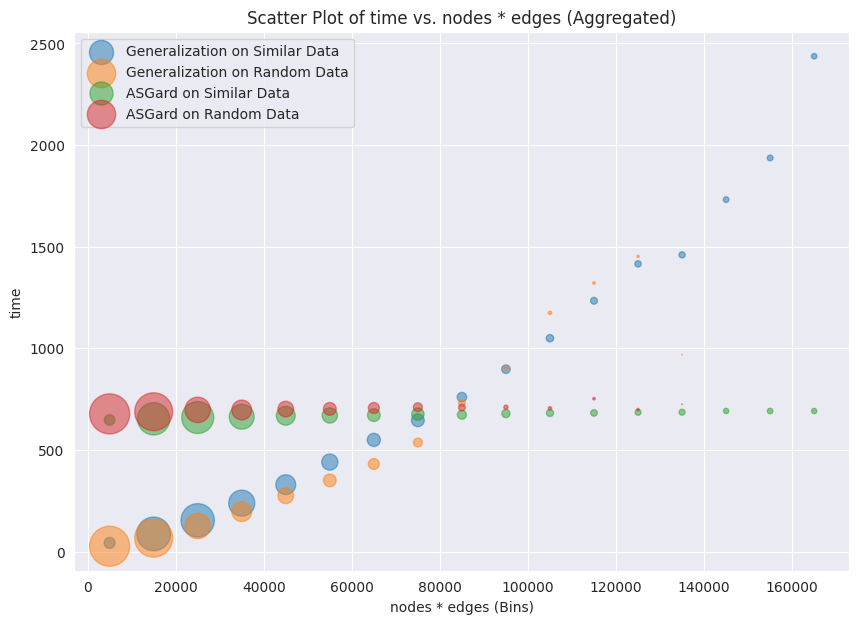

In [45]:
quantile = df['avg_time'].quantile(0.99)
plt_df = df[df['avg_time'] < quantile]

# Define the bin edges for 'MetricA' range
# 0.0 - 1_000_000
bins = [10_000 * i for i in range(18)]

# Create a new column 'MetricA_bin' by binning 'MetricA' values
df['nodes_X_edges_bins'] = pd.cut(df['nodes_X_edges'], bins=bins, include_lowest=True)
random_df['nodes_X_edges_bins'] = pd.cut(random_df['nodes_X_edges'], bins=bins, include_lowest=True)
may_df['nodes_X_edges_bins'] = pd.cut(may_df['nodes_X_edges'], bins=bins, include_lowest=True)
may_random_df['nodes_X_edges_bins'] = pd.cut(may_random_df['nodes_X_edges'], bins=bins, include_lowest=True)

# Group the data by 'MetricA_bin' and calculate the mean of 'MetricB'
grouped_1_data = df.groupby('nodes_X_edges_bins')['avg_time'].mean().reset_index()
grouped_1_data['nodes_X_edges_bins_numeric'] = grouped_1_data['nodes_X_edges_bins'].apply(lambda x: x.mid)
grouped_1_data['weights'] = df.groupby('nodes_X_edges_bins')['avg_time'].count().reset_index()['avg_time'] / 4

grouped_2_data = random_df.groupby('nodes_X_edges_bins')['avg_time'].mean().reset_index()
grouped_2_data['nodes_X_edges_bins_numeric'] = grouped_2_data['nodes_X_edges_bins'].apply(lambda x: x.mid)
grouped_2_data['weights'] = random_df.groupby('nodes_X_edges_bins')['avg_time'].count().reset_index()['avg_time'] / 4

grouped_3_data = may_df.groupby('nodes_X_edges_bins')['avg_time'].mean().reset_index()
grouped_3_data['nodes_X_edges_bins_numeric'] = grouped_3_data['nodes_X_edges_bins'].apply(lambda x: x.mid)
grouped_3_data['weights'] = may_df.groupby('nodes_X_edges_bins')['avg_time'].count().reset_index()['avg_time'] / 4

grouped_4_data = may_random_df.groupby('nodes_X_edges_bins')['avg_time'].mean().reset_index()
grouped_4_data['nodes_X_edges_bins_numeric'] = grouped_4_data['nodes_X_edges_bins'].apply(lambda x: x.mid)
grouped_4_data['weights'] = may_random_df.groupby('nodes_X_edges_bins')['avg_time'].count().reset_index()['avg_time'] / 4

plt.figure(figsize=(10, 7))

# Create a scatter plot
plt.scatter(grouped_1_data['nodes_X_edges_bins_numeric'], grouped_1_data['avg_time'], label='Generalization on Similar Data', s=grouped_1_data['weights'], alpha=0.5)
plt.scatter(grouped_2_data['nodes_X_edges_bins_numeric'], grouped_2_data['avg_time'], label='Generalization on Random Data', s=grouped_2_data['weights'], alpha=0.5)
plt.scatter(grouped_3_data['nodes_X_edges_bins_numeric'], grouped_3_data['avg_time'], label='ASGard on Similar Data', s=grouped_3_data['weights'], alpha=0.5)
plt.scatter(grouped_4_data['nodes_X_edges_bins_numeric'], grouped_4_data['avg_time'], label='ASGard on Random Data', s=grouped_4_data['weights'], alpha=0.5)

# Customize the plot
plt.xlabel('nodes * edges (Bins)')
plt.ylabel('time')
plt.title('Scatter Plot of time vs. nodes * edges (Aggregated)')
plt.legend()

# Display the
plt.show()

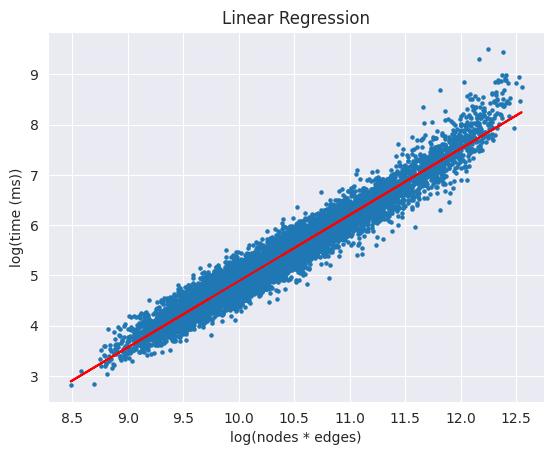

{'coef': 1.3178567390513527, 'intercept': -8.292960545863492, 'r_squared': 0.9464821506178782}


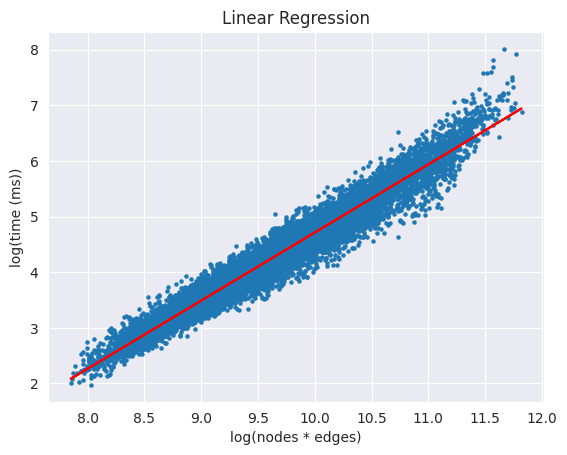

{'coef': 1.2234815762784648, 'intercept': -7.52095776327519, 'r_squared': 0.9518952027085408}


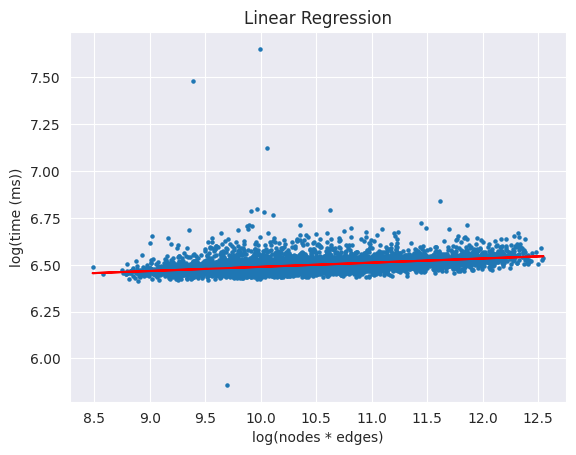

{'coef': 0.022280760343580563, 'intercept': 6.266305584231739, 'r_squared': 0.17129219032903165}


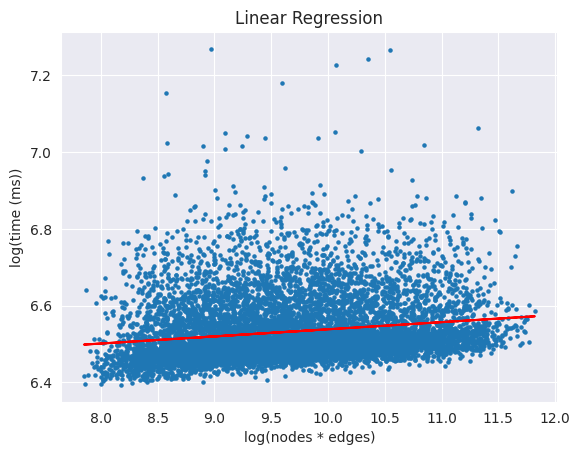

{'coef': 0.01856805808713183, 'intercept': 6.352869817289541, 'r_squared': 0.03173868818437442}


In [49]:
linear_regression_of(df, 'log_nodes_X_edges', 'log_avg_time', x_label='log(nodes * edges)', y_label='log(time (ms))', title='Linear Regression')
linear_regression_of(random_df, 'log_nodes_X_edges', 'log_avg_time', x_label='log(nodes * edges)', y_label='log(time (ms))', title='Linear Regression')
linear_regression_of(may_df, 'log_nodes_X_edges', 'log_avg_time', x_label='log(nodes * edges)', y_label='log(time (ms))', title='Linear Regression')
linear_regression_of(may_random_df, 'log_nodes_X_edges', 'log_avg_time', x_label='log(nodes * edges)', y_label='log(time (ms))', title='Linear Regression')

/tmp/ipykernel_2291045/764806638.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_df['log_nodes_X_edges_bins'] = pd.cut(plt_df['log_nodes_X_edges'], bins=bins, include_lowest=True)


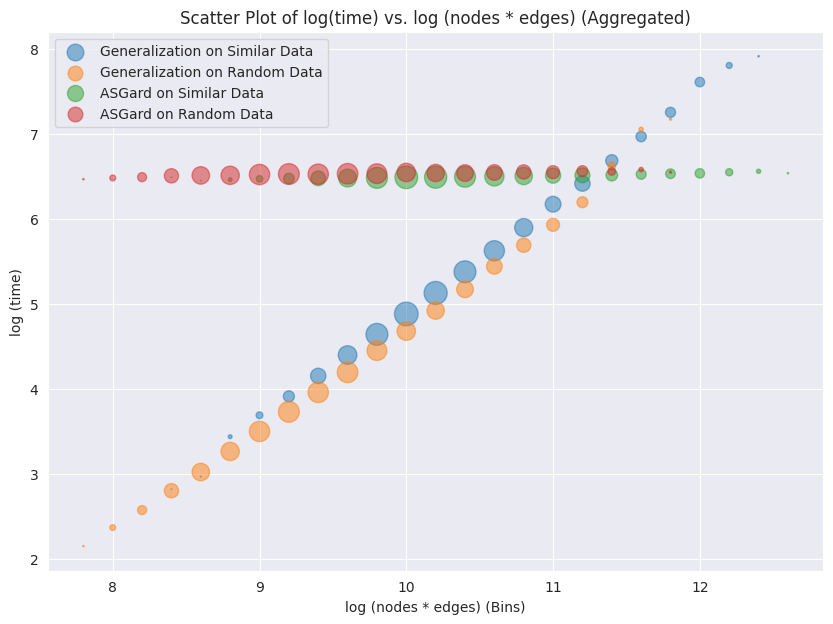

In [46]:
quantile = df['avg_time'].quantile(0.99)
plt_df = df[df['avg_time'] < quantile]

# Define the bin edges for 'MetricA' range
# 8.5 - 12.5
bins = [7.5 + 0.20 * i for i in range(40)]

# Create a new column 'MetricA_bin' by binning 'MetricA' values
plt_df['log_nodes_X_edges_bins'] = pd.cut(plt_df['log_nodes_X_edges'], bins=bins, include_lowest=True)
random_df['log_nodes_X_edges_bins'] = pd.cut(random_df['log_nodes_X_edges'], bins=bins, include_lowest=True)
may_df['log_nodes_X_edges_bins'] = pd.cut(may_df['log_nodes_X_edges'], bins=bins, include_lowest=True)
may_random_df['log_nodes_X_edges_bins'] = pd.cut(may_random_df['log_nodes_X_edges'], bins=bins, include_lowest=True)

# Group the data by 'MetricA_bin' and calculate the mean of 'MetricB'
grouped_1_data = plt_df.groupby('log_nodes_X_edges_bins')['log_avg_time'].mean().reset_index()
grouped_1_data['log_nodes_X_edges_bins_numeric'] = grouped_1_data['log_nodes_X_edges_bins'].apply(lambda x: x.mid)
grouped_1_data['weights'] = plt_df.groupby('log_nodes_X_edges_bins')['log_avg_time'].count().reset_index()['log_avg_time'] / 4

grouped_2_data = random_df.groupby('log_nodes_X_edges_bins')['log_avg_time'].mean().reset_index()
grouped_2_data['log_nodes_X_edges_bins_numeric'] = grouped_2_data['log_nodes_X_edges_bins'].apply(lambda x: x.mid)
grouped_2_data['weights'] = random_df.groupby('log_nodes_X_edges_bins')['log_avg_time'].count().reset_index()['log_avg_time'] / 4

grouped_3_data = may_df.groupby('log_nodes_X_edges_bins')['log_avg_time'].mean().reset_index()
grouped_3_data['log_nodes_X_edges_bins_numeric'] = grouped_3_data['log_nodes_X_edges_bins'].apply(lambda x: x.mid)
grouped_3_data['weights'] = may_df.groupby('log_nodes_X_edges_bins')['log_avg_time'].count().reset_index()['log_avg_time'] / 4

grouped_4_data = may_random_df.groupby('log_nodes_X_edges_bins')['log_avg_time'].mean().reset_index()
grouped_4_data['log_nodes_X_edges_bins_numeric'] = grouped_4_data['log_nodes_X_edges_bins'].apply(lambda x: x.mid)
grouped_4_data['weights'] = may_random_df.groupby('log_nodes_X_edges_bins')['log_avg_time'].count().reset_index()['log_avg_time'] / 4

plt.figure(figsize=(10, 7))

# Create a scatter plot
plt.scatter(grouped_1_data['log_nodes_X_edges_bins_numeric'], grouped_1_data['log_avg_time'], label='Generalization on Similar Data', s=grouped_1_data['weights'], alpha=0.5)
plt.scatter(grouped_2_data['log_nodes_X_edges_bins_numeric'], grouped_2_data['log_avg_time'], label='Generalization on Random Data', s=grouped_2_data['weights'], alpha=0.5)
plt.scatter(grouped_3_data['log_nodes_X_edges_bins_numeric'], grouped_3_data['log_avg_time'], label='ASGard on Similar Data', s=grouped_3_data['weights'], alpha=0.5)
plt.scatter(grouped_4_data['log_nodes_X_edges_bins_numeric'], grouped_4_data['log_avg_time'], label='ASGard on Random Data', s=grouped_4_data['weights'], alpha=0.5)


# Customize the plot
plt.xlabel('log (nodes * edges) (Bins)')
plt.ylabel('log (time)')
plt.title('Scatter Plot of log(time) vs. log (nodes * edges) (Aggregated)')
plt.legend()

# Display the
plt.show()

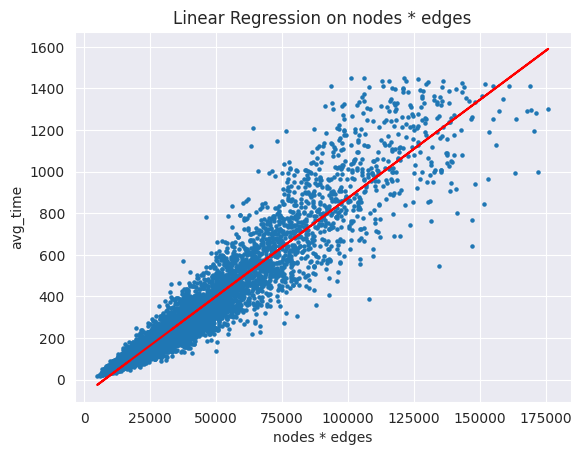

{'coef': 0.00944322735515848, 'intercept': -71.05662889952936, 'r_squared': 0.9044776154029063}


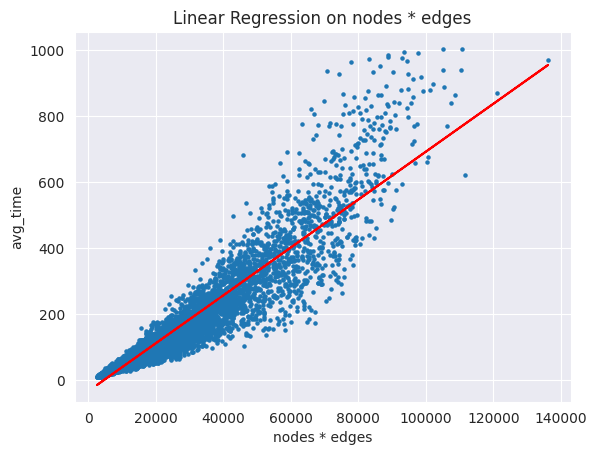

{'coef': 0.007256707705568302, 'intercept': -34.16747831015266, 'r_squared': 0.8852116842811615}


In [52]:
quantile = df['avg_time'].quantile(0.95)
plt_df = df[df['avg_time'] < quantile]

quantile = random_df['avg_time'].quantile(0.995)
random_plt_df = random_df[random_df['avg_time'] < quantile]

linear_regression_of(plt_df, 'nodes_X_edges', 'avg_time', x_label='nodes * edges', y_label='avg_time', title='Linear Regression on nodes * edges')
linear_regression_of(random_plt_df, 'nodes_X_edges', 'avg_time', x_label='nodes * edges', y_label='avg_time', title='Linear Regression on nodes * edges')

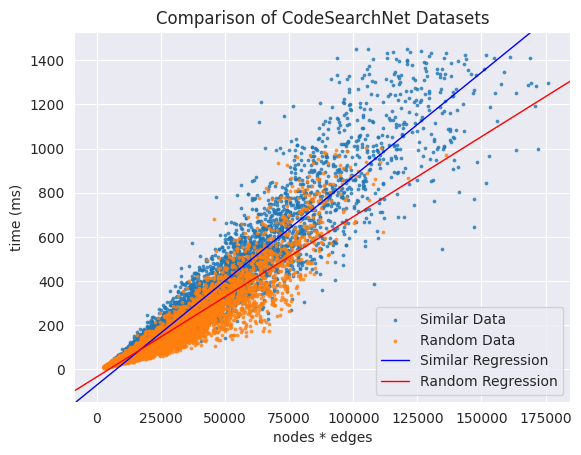

In [57]:
# Create a scatter plot for all metrics
plt.scatter(plt_df['nodes_X_edges'], plt_df['avg_time'], label='Similar Data', s=3, alpha=0.7)
plt.scatter(random_plt_df['nodes_X_edges'], random_plt_df['avg_time'], label='Random Data', s=3, alpha=0.7)
plt.axline((0, -71.05662889952936), (71.05662889952936/0.00944322735515848, 0), linewidth=1, color='b', label='Similar Regression')
plt.axline((0, -34.16747831015266), (34.16747831015266/0.007256707705568302, 0), linewidth=1, color='r', label='Random Regression')

# Customize the plot
plt.xlabel('nodes * edges')
plt.ylabel('time (ms)')
plt.title('Comparison of CodeSearchNet Datasets')
plt.legend()

# Display the plot
plt.show()

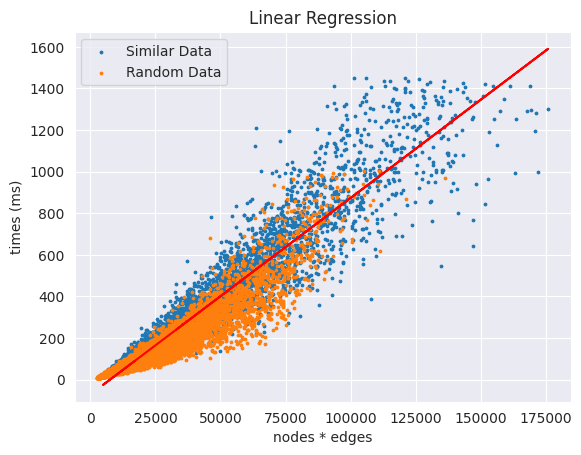

{'coef': 0.00944322735515848, 'intercept': -71.05662889952936, 'r_squared': 0.9044776154029063, 'r_squared_random': 0.800780214561248}


In [54]:
x_column = 'nodes_X_edges'
y_column = 'avg_time'

X = plt_df[x_column].values.reshape(-1, 1)
Y = plt_df[y_column].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
r_squared = r2_score(Y, Y_pred)

plt.scatter(X, Y, s=3, label='Similar Data')
plt.plot(X, Y_pred, color='red')

X = random_plt_df[x_column].values.reshape(-1, 1)
Y = random_plt_df[y_column].values.reshape(-1, 1)
Y_pred = linear_regressor.predict(X)
r_squared_random = r2_score(Y, Y_pred)
plt.scatter(X, Y, s=3, label='Random Data')

plt.xlabel('nodes * edges')
plt.ylabel('times (ms)')
plt.title('Linear Regression')
plt.legend()
plt.show()

data = {'coef': linear_regressor.coef_[0][0], 'intercept': linear_regressor.intercept_[0], 'r_squared': r_squared, 'r_squared_random': r_squared_random}
print(data)

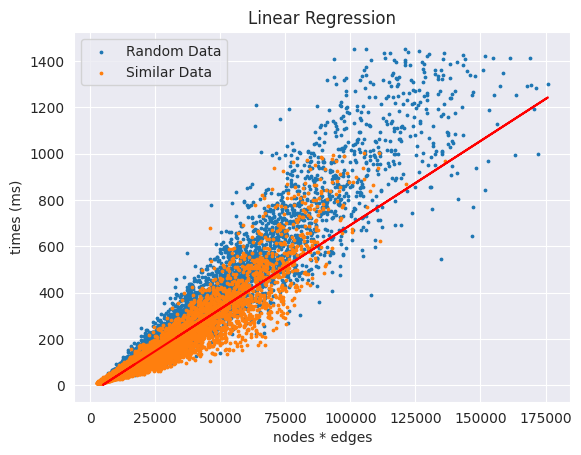

{'coef': 0.007256707705568302, 'intercept': -34.16747831015266, 'r_squared': 0.8852116842811615, 'r_squared_random': 0.8282991271246907}


In [56]:
x_column = 'nodes_X_edges'
y_column = 'avg_time'

X_sim = random_plt_df[x_column].values.reshape(-1, 1)
Y_sim = random_plt_df[y_column].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X_sim, Y_sim)
Y_sim_pred = linear_regressor.predict(X_sim)
r_squared = r2_score(Y_sim, Y_sim_pred)

plt.plot(X, Y_pred, color='red')

X = plt_df[x_column].values.reshape(-1, 1)
Y = plt_df[y_column].values.reshape(-1, 1)
Y_pred = linear_regressor.predict(X)
r_squared_random = r2_score(Y, Y_pred)
plt.scatter(X, Y, s=3, label='Random Data')
plt.scatter(X_sim, Y_sim, s=3, label='Similar Data')

plt.xlabel('nodes * edges')
plt.ylabel('times (ms)')
plt.title('Linear Regression')
plt.legend()
plt.show()

data = {'coef': linear_regressor.coef_[0][0], 'intercept': linear_regressor.intercept_[0], 'r_squared': r_squared, 'r_squared_random': r_squared_random}
print(data)